## Giriş Kavramları - Veri ile Tanışma

Makine Öğrenmesi aslıda Veriyi Anlama çabasıdır. Anlama ve Anlamlandırma.

Bu çabanın meyvesine Öğrenme (Learning) diyoruz ve öğrenme iki temel kategoride görülebilir:
* Supervised Learning (Gözetimli Öğrenme)
* Unsupervised Learning (Gözetimsiz Öğrenme)

**Supervised Learning:**

Gözetimli Öğrenmede, ne oldukları net olarak verilmiş girdiler kullanarak bir çıktı elde etmeye çalışırız.

Burada girdilerin aslında hangi çıktıya ait olduğu başta verilmiştir.

Bilmediğimiz ise yeni bir girdi geldiğinde, onun çıktısının ne olacağıdır.

İşte bunu tahminlemek için elimizdeki girdi-çıktı ilişkilerine bakarız.

**Unsupervised Learning:**

Gözetimsiz Öğrenmede elimizde girdiler vardır ancak çıktılar yoktur.

Hangi girdinin, hangi çıktıya karşılık geldiğini bilmeyiz.

Bu sebeple, çıktıyı tahmin etmeye çalışmak olanaksızdır.

Bunun yerine girdiler arasındaki ilişkiye odaklanırız.

Böylece kümeleme yaparak, hangi girdinin başka hangi girdi ile ilişkili olduğunu ve bu ilişkinin derecesini anlamaya çalışırız.

### Supervised Learning

**Örnek:**

**Maaş Verisi**

ABD Atlantik Bölgesindeki bir grup erkek çalışanlara ait maaş verisidir.

Bu veri setinde, `çalışanın maaşı` ile `yaşı`, `eğitim durumu` ve `tecrübe yılı` arasındaki ilişkiyi anlamaya çalışacağız.

In [34]:
# import

import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('Wage.csv')

In [36]:
df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [37]:
df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


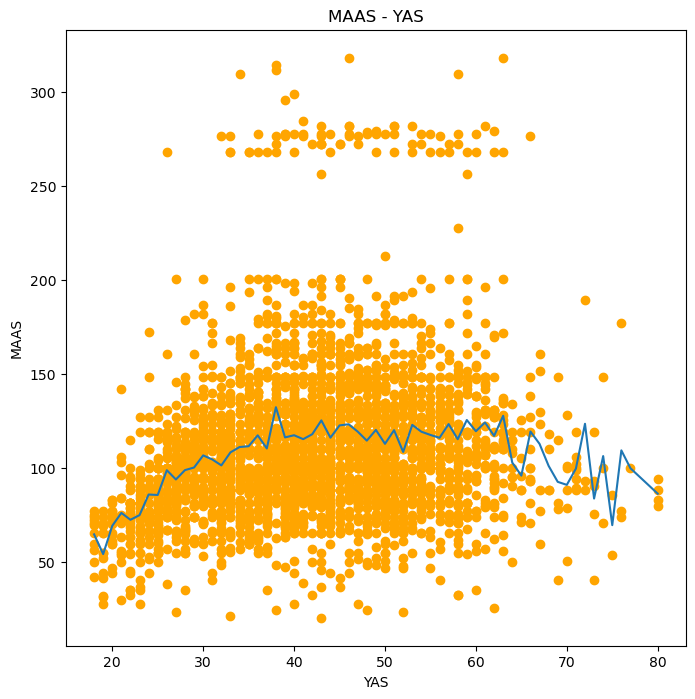

In [38]:
# MAAS - YAS
df1 = df[['age', 'wage']]

# girdi -> input, feature -> X
X = df1['age']

# cikti -> output, label -> y
y = df['wage']

# ortalama hesapla (yaslardaki degerlerin mesela 22 yas, 22 yasdaki maaslarin ortalamasi)
y_mean = df1.groupby('age').mean()

# grafigi hazirla
fig, ax = plt.subplots(figsize=(8, 8))

# datayi ciz
ax.scatter(X, y, color='orange')

# ortalamayi ciz
ax.plot(y_mean.index, y_mean)

# grafigi formatla
plt.title('MAAS - YAS')
plt.xlabel('YAS')
plt.ylabel('MAAS')
plt.show()

In [39]:
y_mean

,wage
age,
18,64.493063
19,53.990486
20,69.033341
21,75.906952
22,72.251667
...,...
74,106.192881
75,69.389644
76,109.219665


In [40]:
y_mean.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 80],
      dtype='int64', name='age')

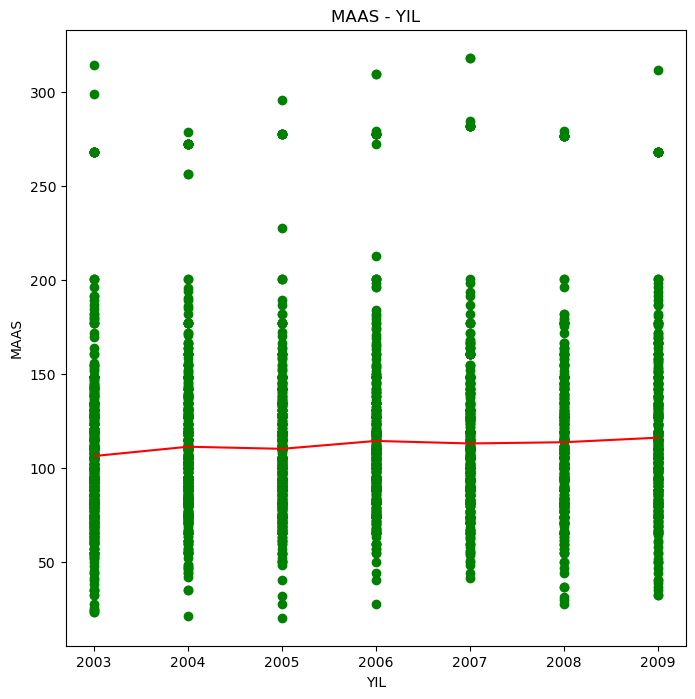

In [41]:
# MAAS - YIL
df2 = df[['year', 'wage']]

# girdi -> feature -> X
X = df2['year']

# cikti -> output, label -> Y
y = df2['wage']

# ortalama hesapla
y_mean = df2.groupby('year').mean()

# grafigi hazirla
fig, ax = plt.subplots(figsize=(8, 8))

# datayi ciz
ax.scatter(X, y, color='green')

# ortalamayi ciz
ax.plot(y_mean.index, y_mean, color ='red')

# grafigi formatla
plt.title('MAAS - YIL')
plt.xlabel('YIL')
plt.ylabel('MAAS')
plt.show()

<Axes: >

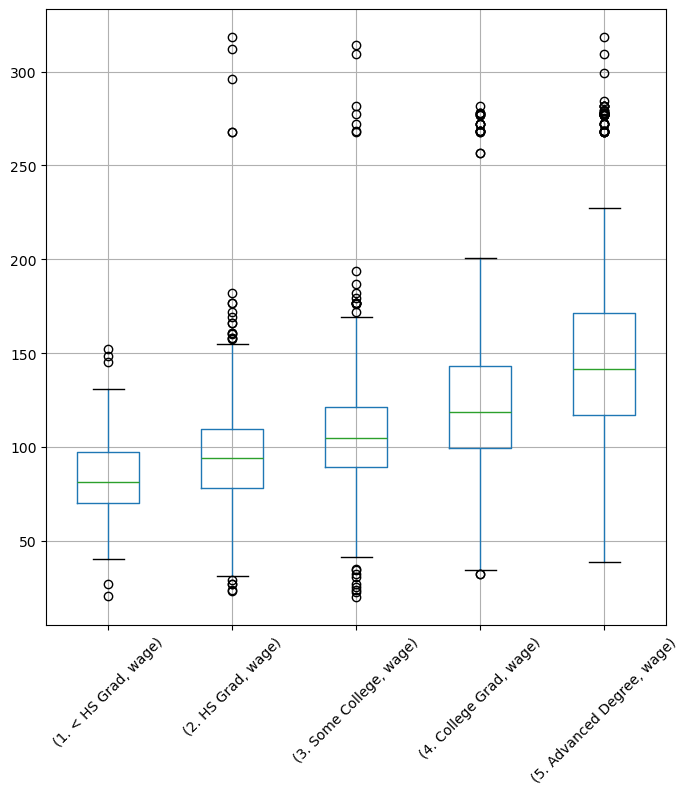

In [42]:
# MAAS - Egitim Duzeyi

# boxplot -> Quartile

df3 = df[['education', 'wage']]

# x -> input
X = df3['education']

# y -> label
y = df3['wage']

# egitim uzerinden gruplandir
y_grouped = df3.groupby('education')

y_grouped.boxplot(subplots=False, figsize=(8, 8), rot=45)

In [43]:
y_grouped.head()

,education,wage
0,1. < HS Grad,75.043154
1,4. College Grad,70.476020
2,3. Some College,130.982177
3,4. College Grad,154.685293
4,2. HS Grad,75.043154
5,4. College Grad,127.115744
6,3. Some College,169.528538
7,3. Some College,111.720849
8,3. Some College,118.884359
9,2. HS Grad,128.680488


**Örnek:**

**Hisse Senedi Piyasası**

Maaş Verilerinde sürekli/sayısal olan bir değişkeni tahmin etmeye çalıştık.

Fakat çoğu zaman sayısal olmayan, kategorik veriler üzerinde çalışırız.

Bu örneğimizde, Standard & Poor's 500 (S&P) indexinin 5 yıllık verisi üzerinde çalışacağız.

Amacımız, herhangi bir gün için index aşağı mı inecek, yoksa yukarı mı çıkacak bunu tahminlemek.

Dolayısı ile, sayısal bir sonuç bulmak değil, aşağı-yukarı şeklindeki iki kategoriden birini bulmak.

Maaş Verisi örneğimiz aslında bir Regresyon Analizi, Hisse Senedi ise bir Sınıflandırma (Classification).

In [44]:
# import
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Smarket.csv')

In [46]:
df.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [47]:
df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


C:\Users\Bilal\AppData\Local\Temp\ipykernel_25800\3577085847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Today'] = df4['Today'].abs()


<Axes: >

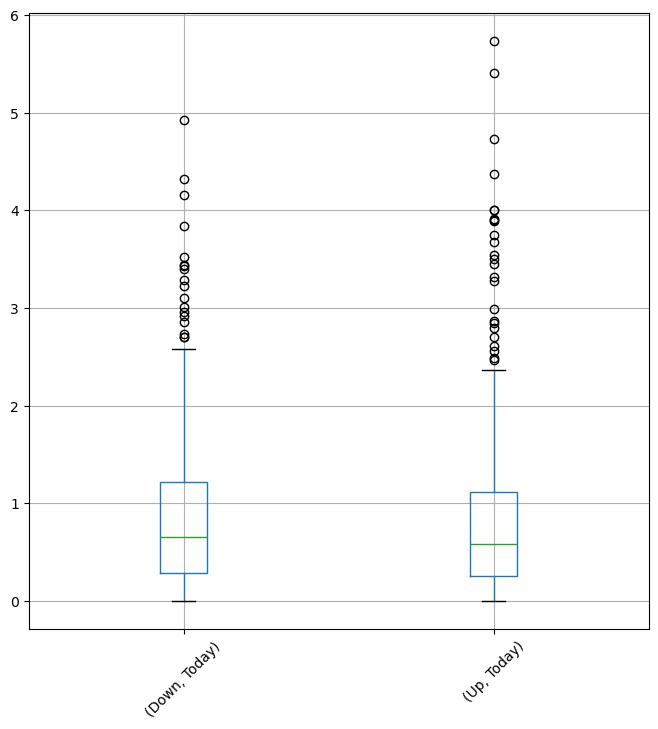

In [48]:
# bugunku fiyat - onceki gun fiyat inceleme
df4 = df[['Today','Direction']]

# negatifleri yonet
df4['Today'] = df4['Today'].abs()

# girdi
X = df4.Today

# cikti
y = df4.Direction

# boxplot
y_grouped = df4.groupby('Direction')

y_grouped.boxplot(subplots=False, rot=45, figsize=(8, 8))

In [49]:
y_grouped.count()

,Today
Direction,
Down,602
Up,648


Gördüğünüz gibi, hisse senetlerinin bugünkü fiyatının aşağı mı yoksa yukarı mı olacağına bir önceki gün fiyatı üzerinden gidemiyoruz.

Sağlıklı bir sonuç vermiyor.

**base oran:** default oran - %50

1250 kayıttan 602 bir önceki güne göre düşmüş, 648 ise yükselmiş. 

Neredeyse yarı yarıya. Yani %50.

Zaten olasılık da %50 dir, ya yukarı ya da aşağı inecektir.

Hisse fiyatı tahmini için bir önceki güne bakmak yerine başka teknikler uygulayacağız ileride.

### Unsupervised Learning

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
df = pd.read_csv('NCI60.csv')

In [52]:
df.head()

,Unnamed: 0,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST


In [53]:
# input -> feature
X = df.iloc[:, 1:6831]
X

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [54]:
# scale yeniden boyutlandir -> ayni olculeri getir

sc = StandardScaler()

In [55]:
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.72867057,  1.60722049,  1.32568834, ...,  0.52089301,
        -0.83636534, -1.38467476],
       [ 1.59641782,  1.7535441 ,  0.44168566, ..., -0.8236521 ,
        -0.92542475, -1.43144619],
       [ 2.19028963, -0.01621694, -0.34909222, ...,  0.00870438,
        -0.96095134, -0.09583766],
       ...,
       [ 0.52313039, -0.78801506, -0.30257053, ...,  0.36723642,
         3.38176079,  2.53525983],
       [-0.07065235,  0.22330662, -0.16300549, ..., -0.46507011,
        -0.21343532, -1.2444386 ],
       [ 0.84285956, -0.32227482,  0.09286376, ...,  0.53369773,
        -0.49820333,  0.71218974]], shape=(64, 6830))

In [56]:
# Principal Component Analysis
# Onemli olan genler (2 adet)-> PCA

pca = PCA(n_components=2)

In [57]:
pca_result = pca.fit_transform(X_scaled)

In [58]:
print('Eigenvalues')
pca.explained_variance_

Eigenvalues


array([788.13026426, 468.77320962])

In [59]:
print('Variances (Percentage)')
pca.explained_variance_ratio_ * 100

Variances (Percentage)


array([11.35894186,  6.75620246])

In [60]:
principalDf = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [61]:
principalDf.head(10)

,PC1,PC2
0,19.838041,-3.555470
1,23.089184,-6.442316
2,27.456115,-2.466193
3,42.816822,9.769068
4,55.418543,5.198801
5,27.178025,-6.779638
6,31.445902,-3.864453
7,22.332345,-10.394166
8,14.289926,-16.109340
9,29.748084,-23.993743


In [62]:
finalDf = pd.concat([principalDf, df[['labs']]], axis=1)

In [63]:
finalDf.head(10)

,PC1,PC2,labs
0,19.838041,-3.555470,CNS
1,23.089184,-6.442316,CNS
2,27.456115,-2.466193,CNS
3,42.816822,9.769068,RENAL
4,55.418543,5.198801,BREAST
5,27.178025,-6.779638,CNS
6,31.445902,-3.864453,CNS
7,22.332345,-10.394166,BREAST
8,14.289926,-16.109340,NSCLC
9,29.748084,-23.993743,NSCLC


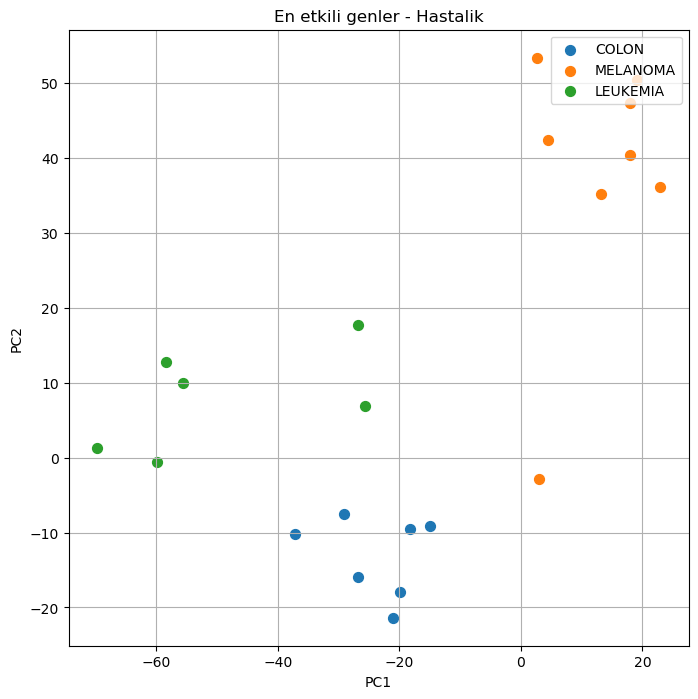

In [64]:
# plot PCA

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('En etkili genler - Hastalik')

targets = ['COLON', 'MELANOMA', 'LEUKEMIA']

for target in targets:
    indexler = finalDf['labs'] == target
    ax.scatter(finalDf.loc[indexler, 'PC1'],
              finalDf.loc[indexler, 'PC2'], s = 50)

ax.legend(targets, loc='upper right')
ax.grid()